<a href="https://colab.research.google.com/github/redR0b0t/ACDC/blob/master/lab_ia_prep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#A*

def aStar(start_node,stop_node):

  open_set=[start_node]
  closed_set=[]
  g={}
  g[start_node]=0
  parent={}
  parent[start_node]=start_node

  while len(open_set)>0:
    n=None

    for v in open_set:
      if n==None or g[v]+h[v]<g[n]+h[n]:
        n=v
    if n==stop_node or graph_nodes[n]==None:
      pass
    else:
      for (m,weight) in get_neighbors(n):
        if m not in open_set and m not in closed_set:
          open_set.append(m)
          parent[m]=n
          g[m]=g[n]+weight
        else:
          if g[m]>g[n]+weight:
            g[m]=g[n]+weight
            parent[m]=n
            if m in closed_set:
              closed_set.remove(m)
              open_set.append(m)

    if n==None:
      print("path does not exist")
      return None
    if n==stop_node:
      path=[]
      while parent[n]!=n:
        path.append(n)
        n=parent[n]
      path.append(start_node)
      path.reverse()
      print(path)
      return path

    open_set.remove(n)
    closed_set.append(n)  

  print("path not found")

def get_neighbors(n):
  return graph_nodes.get(n,None)
h={'a':15,'b':10,'c':20,'d':7,'e':0}
graph_nodes={
    'a':[('b',6),('c',8)],
    'b':[('d',6)],
    'd':[('e',6)],
    'c':[('e',6)],

}

aStar('a','e')

['a', 'b', 'd', 'e']


['a', 'b', 'd', 'e']

In [ ]:
#AO*
class Graph:
  def __init__(self,graph,heuristicNodeList,start_node):
    self.graph=graph
    self.h=heuristicNodeList
    self.start=start_node
    self.parents={}
    self.status={}
    self.solutionGraph={}

  def applyaoStar(self,v):
    self.aoStar(v,False)
  def getStatus(self,n):
    return self.status.get(n,0)
  def setStatus(self,n,val):
    self.status[n]=val
  def getHeuristicValue(self,n):
    return self.h.get(n,0)
  def setHeuristicValue(self,n,val):
    self.h[n]=val
  def getNeighbors(self,n):
    return self.graph.get(n,'')

  def printSolution(self):
    print("solutionGraph",self.solutionGraph)

  def computeMinCostChildNodes(self,v):
    minCost=0
    costToChildNodes={}
    costToChildNodes[minCost]=[]
    flag=True
    print("neighbors=",v,self.getNeighbors(v))
    for nodeInfoTupleList in self.getNeighbors(v):
      cost=0
      childNodeList=[]
      for (n,weight) in nodeInfoTupleList:
        cost+=self.getHeuristicValue(n)+weight
        childNodeList.append(n)
      if flag or minCost>cost:
        print("changing minCost")
        minCost=cost
        costToChildNodes[minCost]=childNodeList
        flag=False
    print("returning ",costToChildNodes[minCost])
    return minCost,costToChildNodes[minCost]
    
  def aoStar(self,v,backTracking):
    if self.getStatus(v)>=0:
      minCost,childNodeList=self.computeMinCostChildNodes(v)
      self.setHeuristicValue(v,minCost)
      self.setStatus(v,len(childNodeList))

      solved=True
      for childNode in childNodeList:
        self.parents[childNode]=v
        if self.getStatus(childNode)!=-1:
          solved=solved&False
      print(childNodeList)

      if solved:
        print("adding to solution graph")
        self.setStatus(v,-1)
        self.solutionGraph[v]=childNodeList

      if v!=self.start:
        self.aoStar(self.parents[v],True)

      if not backTracking:
        for childNode in childNodeList:
          self.setStatus(childNode,0)
          self.aoStar(childNode,False)

if __name__=="__main__":
  h1={
      'a':6,
      'b':8,
      'c':9,
      'd':12,
      'e':0,
  }
  g1={
      'a':[[('b',6),('c',6)],[('d',6)]],
      'b':[[('e',6)]]
  }
  ao1=Graph(g1,h1,'a')
  ao1.applyaoStar('a')
  ao1.printSolution()
  
      

neighbors= a [[('b', 6), ('c', 6)], [('d', 6)]]
changing minCost
changing minCost
returning  ['d']
['d']
neighbors= d 
returning  []
[]
adding to solution graph
neighbors= a [[('b', 6), ('c', 6)], [('d', 6)]]
changing minCost
changing minCost
returning  ['d']
['d']
adding to solution graph
solutionGraph {'d': [], 'a': ['d']}


In [ ]:
#CE

import csv
import random

def g_0(n):
  return ("?",)*n
def s_0(n):
  return ("$",)*n
def more_general(h1,h2):
  more_general_parts=[]
  for x,y in zip(h1,h2):
    mg=x=="?" or (x!='$' and (x==y or y=='$'))
    more_general_parts.append(mg)
  return all(more_general_parts)
def fulfills(example,h):
  return more_general(h,example)
def min_generalizations(h,x):
  h_new=list(h)
  for i in range(len(h)):
    if not fulfills(x[i:i+1],h[i:i+1]):
      h_new[i]="?" if h[i]!='$' else x[i]
  return [tuple(h_new)]

def min_specializations(h,domains,x):
  results=[]
  for i in range(len(h)):
    if h[i]=='?':
      for val in domains[i]:
        if x[i]!=val:
          h_new=h[:i]+(val,)+h[i+1:]
          results.append(h_new)
    elif h[i]!='$':
      h_new=h[:i]+('$,')+h[i+1:]
      results.append(h_new)
  return results
    

examples=[]
with open('trainingExamples.csv') as csvFile:
  examples=[tuple(line) for line in csv.reader(csvFile)]

def getDomains(examples):
  d=[set() for i in range(len(examples[0]))]
  for x in examples:
    for i ,xi in enumerate(x):
      d[i].add(xi)
  print(d)
  return d


def candidateElimination(examples):
  domains=getDomains(examples)[:-1]
  G=set([g_0(len(domains))])
  S=set([s_0(len(domains))])
  for xcx in examples:
    print(G,S,sep='\n')
    x,cx=xcx[:-1],xcx[-1]
    if cx=='Y':
      G={g for g in G if fulfills(x,g)}
      S=generalize_S(x,G,S)
    else:
      S={s for s in S if not fulfills(x,s)}
      G=specialize_G(x,domains,G,S)

  print(G,S,sep='\n')

def generalize_S(x,G,S):
  s_prev=list(S)
  for s in s_prev:
    if s not in S:
      continue
    if not fulfills(x,s):
      S.remove(s)
      splus=min_generalizations(s,x)
      S.update([h1 for h1 in splus if any([more_general(h2,h1) for h2 in G])])
      S.difference_update([h1 for h1 in S if any([more_general(h1,h2) for h2 in S if h1!=h2])])

  return S
  
def specialize_G(x,domains,G,S):
  # print(G)
  g_prev=list(G)
  for g in g_prev:
    if g not in G:
      continue
    if fulfills(x,g):
      G.remove(g)
      gminus=min_specializations(g,domains,x)
      G.update([h1 for h1 in gminus if any([more_general(h1,h2) for h2 in S])])
      G.difference_update([h1 for h1 in G if any([more_general(h2,h1) for h2 in G if h1!=h2])])
  return G

candidateElimination(examples)  


[{'mild', 'low', 'high'}, {'cold', 'warm'}, {'sunny'}, {'Y', 'N'}]
{('?', '?', '?')}
{('$', '$', '$')}
{('?', 'warm', '?'), ('mild', '?', '?'), ('low', '?', '?')}
{('$', '$', '$')}
{('?', 'warm', '?'), ('low', '?', '?')}
{('low', 'warm', 'sunny')}
{('?', 'warm', '?')}
{('?', 'warm', 'sunny')}
{('?', 'warm', '?')}
{('?', 'warm', 'sunny')}


In [ ]:
#knn

from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import numpy as np

iris_dataset=load_iris()
x_train,x_test,y_train,y_test=train_test_split(iris_dataset['data'],iris_dataset['target'],random_state=0)
print(x_train,y_train,sep='\n')
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)

for i in range(len(x_test)):
  x_new=np.array([x_test[i]])
  prediction=knn.predict(x_new)
  print("actual {0} {1}".format(y_test[i],iris_dataset['target_names'][y_test[i]]),end='   ')
  print("predicted {0} {1}".format(prediction,iris_dataset['target_names'][prediction]))

print("accuracy score=",knn.score(x_test,y_test))



[[5.9 3.  4.2 1.5]
 [5.8 2.6 4.  1.2]
 [6.8 3.  5.5 2.1]
 [4.7 3.2 1.3 0.2]
 [6.9 3.1 5.1 2.3]
 [5.  3.5 1.6 0.6]
 [5.4 3.7 1.5 0.2]
 [5.  2.  3.5 1. ]
 [6.5 3.  5.5 1.8]
 [6.7 3.3 5.7 2.5]
 [6.  2.2 5.  1.5]
 [6.7 2.5 5.8 1.8]
 [5.6 2.5 3.9 1.1]
 [7.7 3.  6.1 2.3]
 [6.3 3.3 4.7 1.6]
 [5.5 2.4 3.8 1.1]
 [6.3 2.7 4.9 1.8]
 [6.3 2.8 5.1 1.5]
 [4.9 2.5 4.5 1.7]
 [6.3 2.5 5.  1.9]
 [7.  3.2 4.7 1.4]
 [6.5 3.  5.2 2. ]
 [6.  3.4 4.5 1.6]
 [4.8 3.1 1.6 0.2]
 [5.8 2.7 5.1 1.9]
 [5.6 2.7 4.2 1.3]
 [5.6 2.9 3.6 1.3]
 [5.5 2.5 4.  1.3]
 [6.1 3.  4.6 1.4]
 [7.2 3.2 6.  1.8]
 [5.3 3.7 1.5 0.2]
 [4.3 3.  1.1 0.1]
 [6.4 2.7 5.3 1.9]
 [5.7 3.  4.2 1.2]
 [5.4 3.4 1.7 0.2]
 [5.7 4.4 1.5 0.4]
 [6.9 3.1 4.9 1.5]
 [4.6 3.1 1.5 0.2]
 [5.9 3.  5.1 1.8]
 [5.1 2.5 3.  1.1]
 [4.6 3.4 1.4 0.3]
 [6.2 2.2 4.5 1.5]
 [7.2 3.6 6.1 2.5]
 [5.7 2.9 4.2 1.3]
 [4.8 3.  1.4 0.1]
 [7.1 3.  5.9 2.1]
 [6.9 3.2 5.7 2.3]
 [6.5 3.  5.8 2.2]
 [6.4 2.8 5.6 2.1]
 [5.1 3.8 1.6 0.2]
 [4.8 3.4 1.6 0.2]
 [6.5 3.2 5.1 2. ]
 [6.7 3.3 5.

In [ ]:

#id3

import pandas as pd

df=pd.read_csv("trainingExamples.csv")

def entropy(probs):
  import math
  return sum([-prob*math.log(prob,2) for prob in probs])

def entropy_list(a_list):
  from collections import Counter
  cnt=Counter(x for x in a_list)
  num_instances=len(a_list)
  probs=[x/num_instances for x in cnt.values()]
  return entropy(probs)

def information_gain(df,split_attr,target_attr):
  df_split=df.groupby(split_attr)
  nobs=1.0*len(df.index)
  df_agg_ent=df_split.agg({target_attr:[entropy_list,lambda x: len(x)/nobs]})[target_attr]
  df_agg_ent.columns=['entropy','propObservations']
  new_entropy=sum(df_agg_ent['entropy']*df_agg_ent['propObservations'])
  old_entropy=entropy_list(df[target_attr])
  return old_entropy-new_entropy

def id3(df,target_attr,attr_names,default_class=None):
  from collections import Counter

  cnt=Counter(x for x in df[target_attr])

  if len(cnt)==1:
    return next(iter(cnt))
  elif df.empty or (not attr_names):
    return default_class
  else:
    gainz=[information_gain(df,attr,target_attr) for attr in attr_names]
    best_index=gainz.index(max(gainz))
    best_attr=attr_names[best_index]
    tree={best_attr:{}}
    remaining_attr=[attr for attr in attr_names if attr!=best_attr]
    for attr_val,subset in df.groupby(best_attr):
      subtree=id3(subset,target_attr,attr_names)
      tree[best_attr][attr_val]=subtree
  return tree


def classify(instance,tree,default=None):
  attr=next(iter(tree))
  if instance[attr] in tree[attr].keys():
    result=tree[attr][instance[attr]]
    if isinstance(result,dict):
      classify(instance,result)
    else:
      return result
  else:
    return default

all_attrs=list(df.columns)
target_attr=all_attrs[-1]
attr_names=all_attrs[:-1]
id3(df,target_attr,attr_names)



{'temp': {'cold': 'N', 'warm': 'Y'}}

In [ ]:
#ANN
import numpy as np
x=np.array(([2,9],[1,5],[3,6]),dtype=float)
y=np.array(([92],[6],[8]),dtype=float)

x=x/np.amax(x,axis=0)
y=y/100

def sigmoid(x):
  return 1/(1+np.exp(-x))
def derivative_sigmoid(x):
  return x*(1-x)

epoch=50000
lr=0.1
il_neurons=2
hl_neurons=3
ol_neurons=1

wh=np.random.uniform(size=(il_neurons,hl_neurons))
bh=np.random.uniform(size=(1,hl_neurons))

wout=np.random.uniform(size=(hl_neurons,ol_neurons))
bout=np.random.uniform(size=(1,ol_neurons))

for i in range(epoch):
  hinp1=np.dot(x,wh)
  hinp=hinp1+bh
  hlayer_act=sigmoid(hinp)

  outinp1=np.dot(hlayer_act,wout)
  outinp=outinp1+bout
  output=sigmoid(outinp)

  EO=y-output
  outgrad=derivative_sigmoid(output)
  d_output=EO*outgrad

  EH=d_output.dot(wout.T)
  hiddengrad=derivative_sigmoid(hlayer_act)
  d_hidden=EH*hiddengrad

  wh+=x.T.dot(d_hidden)*lr
  wout+=hlayer_act.T.dot(d_output)*lr

print(x,y,output,sep='\n')



[[0.66666667 1.        ]
 [0.33333333 0.55555556]
 [1.         0.66666667]]
[[0.92]
 [0.06]
 [0.08]]
[[0.89172478]
 [0.09318986]
 [0.08216614]]


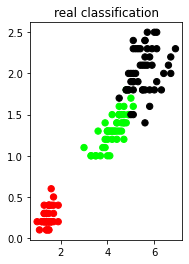

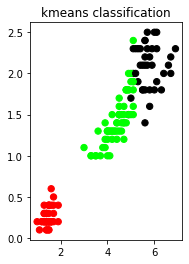

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]
accuracy of km= 0.8933333333333333
confusion matrix= [[50  0  0]
 [ 0 48  2]
 [ 0 14 36]]
     sepal_lenght  sepal_width  petal_leght  petal_width
49      -1.021849     0.558611    -1.340227    -1.315444
59      -0.779513    -0.822570     0.080709     0.264142
37      -1.143017     1.249201    -1.340227    -1.447076
101     -0.052506    -0.822570     0.762758     0.922303
115      0.674501     0.328414     0.876433     1.448832


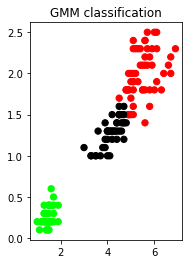

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 2 1
 1 1 1 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
accuracy= 0.9666666666666667
confusion matrix= [[50  0  0]
 [ 0 45  5]
 [ 0  0 50]]


In [22]:

#kmeans ang GM

import sklearn.metrics as sm
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

l1=[0,1,2]
def rename(s):
  l2=[]
  for i in s:
    if i not in l2:
      l2.append(i)
  for i in range(len(s)):
    pos=l2.index(s[i])
    s[i]=l1[pos]
  return s

idata=load_iris()
x=pd.DataFrame(idata.data)
x.columns=["sepal_length",'sepal_width','petal_length','petal_width']

y=pd.DataFrame(idata.target)
y.columns=['target']

colormap=np.array(['red','lime','black'])
# plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
plt.scatter(x.petal_length,x.petal_width,c=colormap[y.target],s=40)
plt.title("real classification")
plt.show()


model=KMeans(n_clusters=3)
model.fit(x)
plt.subplot(1,2,1)
plt.scatter(x.petal_length,x.petal_width,c=colormap[model.labels_],s=40)
plt.title('kmeans classification')
plt.show()



km=rename(model.labels_)
print(km)
print("accuracy of km=",sm.accuracy_score(y,km))
print("confusion matrix=",sm.confusion_matrix(y,km))


from sklearn import preprocessing
scalar=preprocessing.StandardScaler()
scalar.fit(x)
xsa=scalar.transform(x)
xs=pd.DataFrame(xsa,columns=['sepal_lenght','sepal_width','petal_leght','petal_width'])
print(xs.sample(5))

from sklearn.mixture import GaussianMixture
gm=GaussianMixture(n_components=3)
gm.fit(xs)
y_cluster_gmm=gm.predict(xs)

plt.subplot(1,2,1)
plt.scatter(x.petal_length,x.petal_width,c=colormap[y_cluster_gmm],s=40)
plt.title("GMM classification")

plt.show()

em=rename(y_cluster_gmm)
print(em)
print("accuracy=",sm.accuracy_score(y,em))
print("confusion matrix=",sm.confusion_matrix(y,em))




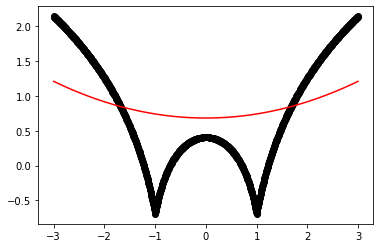

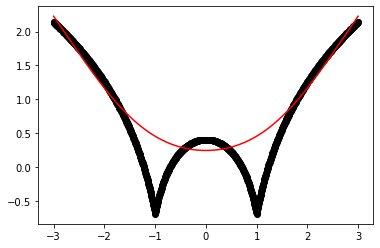

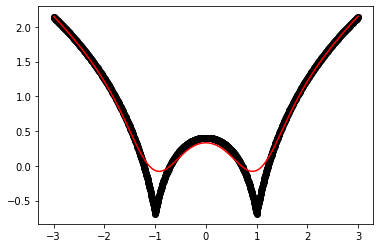

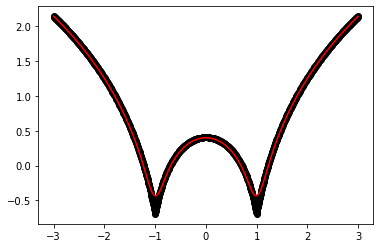

In [29]:

#locally weighted logistic regression

import numpy as np
import matplotlib.pyplot as plt

def local_regression(x0,x,y,tau):
  x0=[1,x0]
  x=[[1,i] for i in x]
  x=np.asarray(x)
  xw=x.T * np.exp(np.sum((x-x0)**2,axis=1)/(-2*tau))
  beta=np.linalg.pinv(xw@x)@xw@y@x0
  return beta

def draw(tau):
  predictions=[local_regression(x0,x,y,tau) for x0 in domains]
  plt.plot(x,y,'o',color='black')
  plt.plot(domains,predictions,color='red')
  plt.show()

x=np.linspace(-3,3,num=1000)
domains=x
y=np.log(np.abs(x**2-1)+0.5)

draw(10)
draw(1)
draw(0.1)
draw(0.01)